## Class for poseData

In [4]:
import cv2

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

nPoints = 18

KEYPOINTS = ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                    'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                    'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']

POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
              [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
              [1,0], [0,14], [14,16], [0,15], [15,17],
              [2,17], [5,16]]


class poseData():
    """
    """
    
    def __init__(self):
        self.POSE_PAIRS = [[1,2], [1,5], [2,3], [3,4], [5,6], [6,7],
                          [1,8], [8,9], [9,10], [1,11], [11,12], [12,13],
                          [1,0], [0,14], [14,16], [0,15], [15,17],
                          [2,17], [5,16]]
        self.KEYPOINTS =  ['Nose', 'Neck', 'R-Sho', 'R-Elb', 'R-Wr', 'L-Sho', 
                            'L-Elb', 'L-Wr', 'R-Hip', 'R-Knee', 'R-Ank', 'L-Hip', 
                            'L-Knee', 'L-Ank', 'R-Eye', 'L-Eye', 'R-Ear', 'L-Ear']
        self.WindowH = 640
        self.WindowW = 360
    
    def dict_to_intDict(self, dict_posePoint):
        return {int(k): v for k, v in dict_posePoint.items()}
        
    def plotSinglePose(self, posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((self.WindowW, self.WindowH))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        
        for pair in self.POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs = [posePoint[pair[0]][0], posePoint[pair[1]][0]]
                ys = [posePoint[pair[0]][1], posePoint[pair[1]][1]]
                plt.plot(xs, ys,'ko-', linewidth=4)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
    
    def plotSinglePose2(self, posePoint):
        '''
        Function to plot the MNIST data on a grid of NxN
        '''
        plt.rcParams['figure.figsize'] = [30, 15]
        #ims = []
        #fig = plt.figure()
        
        imgArray = np.ones((self.WindowW, self.WindowH))
        plt.imshow(imgArray, cmap=plt.cm.Greys, interpolation = 'nearest')
        #ims.append([im])
        plt.axis('off')
        xs = []
        ys = []
        
        for pair in self.POSE_PAIRS:
            # Checking just xcoord for valid point is enough
            valid_pt1 = (posePoint[pair[0]][0] != -1)
            valid_pt2 = (posePoint[pair[1]][0] != -1)
            if valid_pt1 and valid_pt2:
                xs.append([posePoint[pair[0]][0], posePoint[pair[1]][0]])
                ys.append([posePoint[pair[0]][1], posePoint[pair[1]][1]])
            
        plt.plot(xs, ys,'ko-', linewidth=4)
                
        #ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
        #                        repeat_delay=1000)
        plt.show()
        
    def savePoseSequence(self, posePointsDict): ## PosePointsDict is a dictionary w. int point
        fourcc = cv2.VideoWriter_fourcc(*'AVC1')
        out = cv2.VideoWriter(file_output+".mp4", fourcc, 24.0, (640,  360))
        
        for person in posePointsDict:
            for pair in self.POSE_PAIRS:
                # Checking just xcoord for valid point is enough
                valid_pt1 = (person[pair[0]][0] != -1)
                valid_pt2 = (person[pair[1]][0] != -1)
                if valid_pt1 and valid_pt2:
                    xs = [person[pair[0]][0], person[pair[1]][0]]
                    ys = [person[pair[0]][1], person[pair[1]][1]]
                    plt.plot(xs, ys,'ko-')
        
        

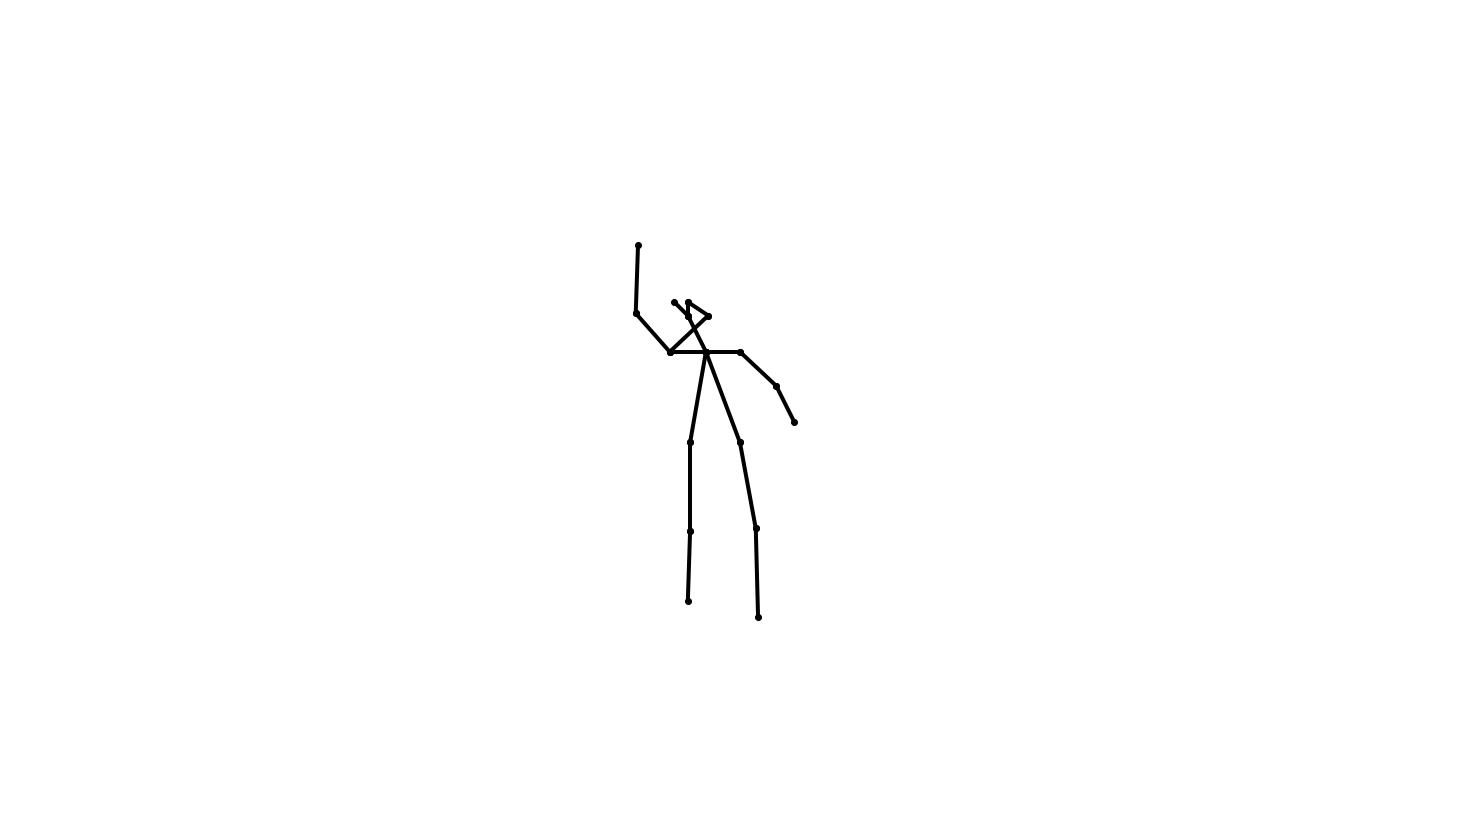

In [303]:
poses = []
with open("../data/frames/4nHElVbT3HY_1_aws.json") as f:
    count = 1
    for line in f:
        poseLine = json.loads(line)
        poses.append(poseLine["pers_coords"])
        if count == 20000:
            break
        count +=1
p = np.random.randint(0, len(poses))   

temp = {"person0": {"0": [222, 112], "1": [228, 136], "2": [205, 136], "3": [199, 169],
                    "4": [206, 198], "5": [247, 137], "6": [253, 175], "7": [245, 184], "8": [214, 200],
                    "9": [207, 254], "10": [213, 301], "11": [238, 206], "12": [236, 254], "13": [214, 292],
                    "14": [221, 105], "15": [229, 105], "16": [214, 107], "17": [237, 106]}}
def getPerson():
    f = open("../data/frames/ITNiqNcl6Mw_1_aws.json")
    for line in f:
        yield json.loads(line)["pers_coords"].values()[0]##["person0"] ## .values()[0]


pers = getPerson()
a = poseData()
p = a.dict_to_intDict(poses[p]["person0"])
a.plotSinglePose(p)
#for i in range(30):
#    print(next(pers))

In [5]:
frameDir = "../data/frames/"
frameFiles = ["4nHElVbT3HY_1.json", "4nHElVbT3HY_1_aws.json", "4nHElVbT3HY_2_aws.json", \
         "ITNiqNcl6Mw_1_aws.json", "ITNiqNcl6Mw_2_aws.json", "M_rPhEjym1o_1_aws.json", "M_rPhEjym1o_2_aws.json", \
         "L5mqL7ADEsY_1_aws.json"]

def getPoseLines(file):
    #count = 1
    with open(frameDir + file, "r") as f:
        for line in f:
            yield json.loads(line)
            """
            try:
                yield json.loads(line)
            except:
                print(f"Cant read JSON line {count}, {file}")
            count += 1
            """


def dict_to_intDict(dict_posePoint):
        return {int(k): v for k, v in dict_posePoint.items()}

def getFlattenedPose(poseDict):
    
    flat = []
    
    #--- Check if keys are int. If string, turn the keys to int
    if type(list(poseDict.keys())[0]) == str:
        poseDict = dict_to_intDict(poseDict)
    
    #--- Get coords of key points
    for keypoint in range(0, 18):
        flat.append(poseDict[keypoint])
    
    #--- Convert to numpy array and then flatten the coords list
    flat = np.array(flat).flatten()
    return flat

'''
def getFlattenedPose_str(strPoseDict):
    intPoseDict = dict_to_intDict(strPoseDict)
    flat = []
    
    for keypoint in range(0, 18):
        flat.append(intDict[keypoint])
    
    flat = np.array(flat).flatten()
    return flat
'''

def getValidHeight(poseDict):
    """
    Assumes the pose is upright
    
    valid height = Nose to R-Knee, Nose to L-Knee, Neck to R-Knee, Nect to L-Knee in y coords
    Retrun person valid height
    
    """
    
    if type(list(poseDict.keys())[0]) == str:
        poseDict = dict_to_intDict(poseDict)
    
    nose_y = poseDict[KEYPOINTS.index('Nose')][1]
    neck_y = poseDict[KEYPOINTS.index('Neck')][1]
    rknee_y = poseDict[KEYPOINTS.index('R-Knee')][1]
    lknee_y = poseDict[KEYPOINTS.index('L-Knee')][1]
    
    h1, h2, h3, h4 = (-1, -1, -1, -1)
    
    if nose_y >0:
        if rknee_y >0:
            h1 = abs(nose_y - rknee_y)
            
        if lknee_y >0:
            h2 = abs(nose_y - lknee_y)
            
    if neck_y >0:
        if rknee_y >0:
            h3 = abs(neck_y - rknee_y)
            
        if lknee_y >0:
            h4 = abs(neck_y - lknee_y)
    
    return [h1, h2, h3, h4]

def getOnePose(multi_person):
    """
    multi_person should be a dictionary of person poses
    {"person0": pose0,
     "person1": pose1,
     "person2": pose2
    }
    
    returns one person pose with largest height:
    {"personMax": poseMax}
    """
    hts = []
    persons = []
    for person, pose in multi_person.items():
        persons.append(person)
        hts.append(getValidHeight(pose))
    
    hts = np.array(hts)
    
    maxHtIdx = []
    for i in range(hts.shape[1]):
        maxHtIdx.append(np.argmax(hts[:,i]))
    # get the most frequent index
    freqIdx = (max(map(lambda val: (maxHtIdx.count(val), val), set(maxHtIdx)))[1])
    
    maxHtPerson = persons[freqIdx]
    pose = {maxHtPerson: multi_person[maxHtPerson]}
    
    return pose



### To assemble data for the model

In [6]:
#### FOR Testing Code
temp = {"person0": {"0": [222, 112], "1": [228, 136], "2": [205, 136], "3": [199, 169],
                    "4": [206, 198], "5": [247, 137], "6": [253, 175], "7": [245, 184], "8": [214, 200],
                    "9": [207, 254], "10": [213, 301], "11": [238, 206], "12": [236, 254], "13": [214, 292],
                    "14": [221, 105], "15": [229, 105], "16": [214, 107], "17": [237, 106]}}

temp_multi = {"person0": {"0": [379, 136], "1": [378, 152], "2": [361, 152],
                            "3": [347, 176], "4": [347, 207], "5": [394, 152],
                            "6": [400, 176], "7": [394, 183], "8": [362, 198],
                            "9": [353, 237], "10": [369, 263], "11": [385, 199],
                            "12": [378, 239], "13": [362, 284], "14": [378, 129],
                            "15": [386, 129], "16": [370, 129], "17": [387, 129]},
                "person1": {"0": [-1, -1], "1": [626, 152], "2": [612, 152],
                            "3": [611, 168], "4": [620, 175], "5": [637, 151], 
                            "6": [637, 167], "7": [-1, -1], "8": [612, 176], 
                            "9": [621, 190], "10": [612, 216], "11": [629, 176], 
                            "12": [637, 191], "13": [637, 215], "14": [-1, -1], 
                            "15": [-1, -1], "16": [-1, -1], "17": [-1, -1]}
               }

temp2_multi = {"person0": {"0": [377, 129], "1": [370, 152], "2": [354, 152], "3": [339, 182], "4": [362, 198], "5": [385, 152], "6": [386, 183], "7": [378, 168], "8": [354, 199], "9": [354, 238], "10": [331, 277], "11": [370, 199], "12": [385, 232], "13": [354, 255], "14": [370, 128], "15": [378, 128], "16": [362, 130], "17": [-1, -1]}, "person1": {"0": [527, 143], "1": [534, 151], "2": [520, 152], "3": [518, 160], "4": [-1, -1], "5": [542, 151], "6": [550, 160], "7": [550, 175], "8": [526, 168], "9": [526, 176], "10": [526, 192], "11": [541, 168], "12": [-1, -1], "13": [-1, -1], "14": [526, 137], "15": [528, 137], "16": [-1, -1], "17": [534, 137]}, "person3": {"0": [596, 135], "1": [596, 144], "2": [588, 144], "3": [-1, -1], "4": [-1, -1], "5": [604, 144], "6": [604, 152], "7": [597, 153], "8": [589, 160], "9": [567, 176], "10": [573, 192], "11": [597, 160], "12": [598, 169], "13": [-1, -1], "14": [596, 130], "15": [597, 130], "16": [-1, -1], "17": [-1, -1]}}
salsaPoseData = [] #This will become dancers X poses(or frames) X 36
count1 = 0
count2 = 0

fps = 24
fps_analysis = 8
fps_step = 3 #for frame differences/steps

pose_data_by_dancer = []
frame_data_by_dancer = []
vids_by_performace = []
for file in frameFiles:
    #lineitems = getLines(file)
    prev_frame = 0
    dancer = []
    frames = []
    video_name = file[:11]
    for line in getPoseLines(file):
        frame_no = line["frame_no"]
        
        #Step1: If time between consective successful frames > 2 secs that is 48
        if prev_frame == 0 or (frame_no - prev_frame)>48:
            # Begin new dancer, but first save previous dancer info if valid
            if len(dancer)>0:
                pose_data_by_dancer.append(dancer)
                frame_data_by_dancer.append(frames)
                vids_by_performace.append(video_name+".mp4")
                
            dancer = []
            frames = []
        
        #Step2: if multi-person frame, get one person
        if line["person_count"] >1:
            dancer_pose = getOnePose(line["pers_coords"])
        else:
            dancer_pose = line["pers_coords"]
        
        #Step3: Flatten the pose
        pose_coords = list(dancer_pose.values())[0]
        
        #Step4: Add pose to dancer
        dancer.append(getFlattenedPose(pose_coords))
        frames.append(frame_no)
        
        #reset
        prev_frame = frame_no
        
print(len(pose_data_by_dancer))
for i in range(len(pose_data_by_dancer)):
    poses = len(pose_data_by_dancer[i])
    #if poses>60
    print(f"Sequence {i+1} has {poses} frames")
"""
#To look at a random sequence of dance
p = np.random.randint(0, len(pose_data_by_dancer)) 
print(pose_data_by_dancer[p])
"""
#print(getFlattenedPose(dict_to_intDict(temp["person0"])))

72
Sequence 1 has 749 frames
Sequence 2 has 690 frames
Sequence 3 has 653 frames
Sequence 4 has 1003 frames
Sequence 5 has 854 frames
Sequence 6 has 629 frames
Sequence 7 has 575 frames
Sequence 8 has 809 frames
Sequence 9 has 22 frames
Sequence 10 has 766 frames
Sequence 11 has 1 frames
Sequence 12 has 619 frames
Sequence 13 has 47 frames
Sequence 14 has 699 frames
Sequence 15 has 78 frames
Sequence 16 has 566 frames
Sequence 17 has 907 frames
Sequence 18 has 43 frames
Sequence 19 has 681 frames
Sequence 20 has 112 frames
Sequence 21 has 465 frames
Sequence 22 has 200 frames
Sequence 23 has 164 frames
Sequence 24 has 509 frames
Sequence 25 has 1 frames
Sequence 26 has 642 frames
Sequence 27 has 664 frames
Sequence 28 has 668 frames
Sequence 29 has 887 frames
Sequence 30 has 809 frames
Sequence 31 has 1080 frames
Sequence 32 has 666 frames
Sequence 33 has 657 frames
Sequence 34 has 819 frames
Sequence 35 has 663 frames
Sequence 36 has 728 frames
Sequence 37 has 885 frames
Sequence 38 h

'\n#To look at a random sequence of dance\np = np.random.randint(0, len(pose_data_by_dancer)) \nprint(pose_data_by_dancer[p])\n'

In [7]:
from joblib import load, dump
#dump(pose_data_by_dancer, "../data/frames/forRNN_pose_by_daner.out")
dump(frame_data_by_dancer, "../data/frames/frame_data_by_dancer.out")
dump(vids_by_performace, "../data/frames/vids_by_performace.out")

['../data/frames/vids_by_performace.out']

In [10]:
perfs = len(frame_data_by_dancer)
perf = np.random.randint(0, perfs)
print((frame_data_by_dancer[perf]))
#print((vids_by_performace))

[58321, 58324, 58327, 58330, 58333, 58336, 58339, 58342, 58345, 58348, 58351, 58354, 58357, 58360, 58363, 58366, 58369, 58372, 58375, 58378, 58381, 58384, 58387, 58390, 58393, 58396, 58399, 58402, 58405, 58408, 58411, 58414, 58417, 58420, 58423, 58426, 58429, 58432, 58435, 58438, 58441, 58444, 58447, 58450, 58453, 58456, 58459, 58462, 58465, 58468, 58471, 58477, 58480, 58483, 58486, 58489, 58492, 58495, 58498, 58501, 58504, 58507, 58510, 58513, 58516, 58519, 58522, 58525, 58528, 58531, 58534, 58537, 58540, 58543, 58546, 58549, 58552, 58555, 58558, 58561, 58564, 58567, 58570, 58573, 58576, 58579, 58582, 58585, 58588, 58591, 58594, 58597, 58600, 58603, 58606, 58609, 58612, 58615, 58618, 58621, 58624, 58627, 58630, 58633, 58636, 58639, 58642, 58645, 58648, 58651, 58654, 58657, 58660, 58663, 58666, 58669, 58672, 58675, 58678, 58681, 58684, 58687, 58690, 58693, 58696, 58699, 58702, 58705, 58708, 58711, 58714, 58717, 58720, 58723, 58726, 58729, 58732, 58735, 58738, 58741, 58744, 58747, 58750

## Below are code blocks for plotting salsa

<IPython.core.display.Javascript object>


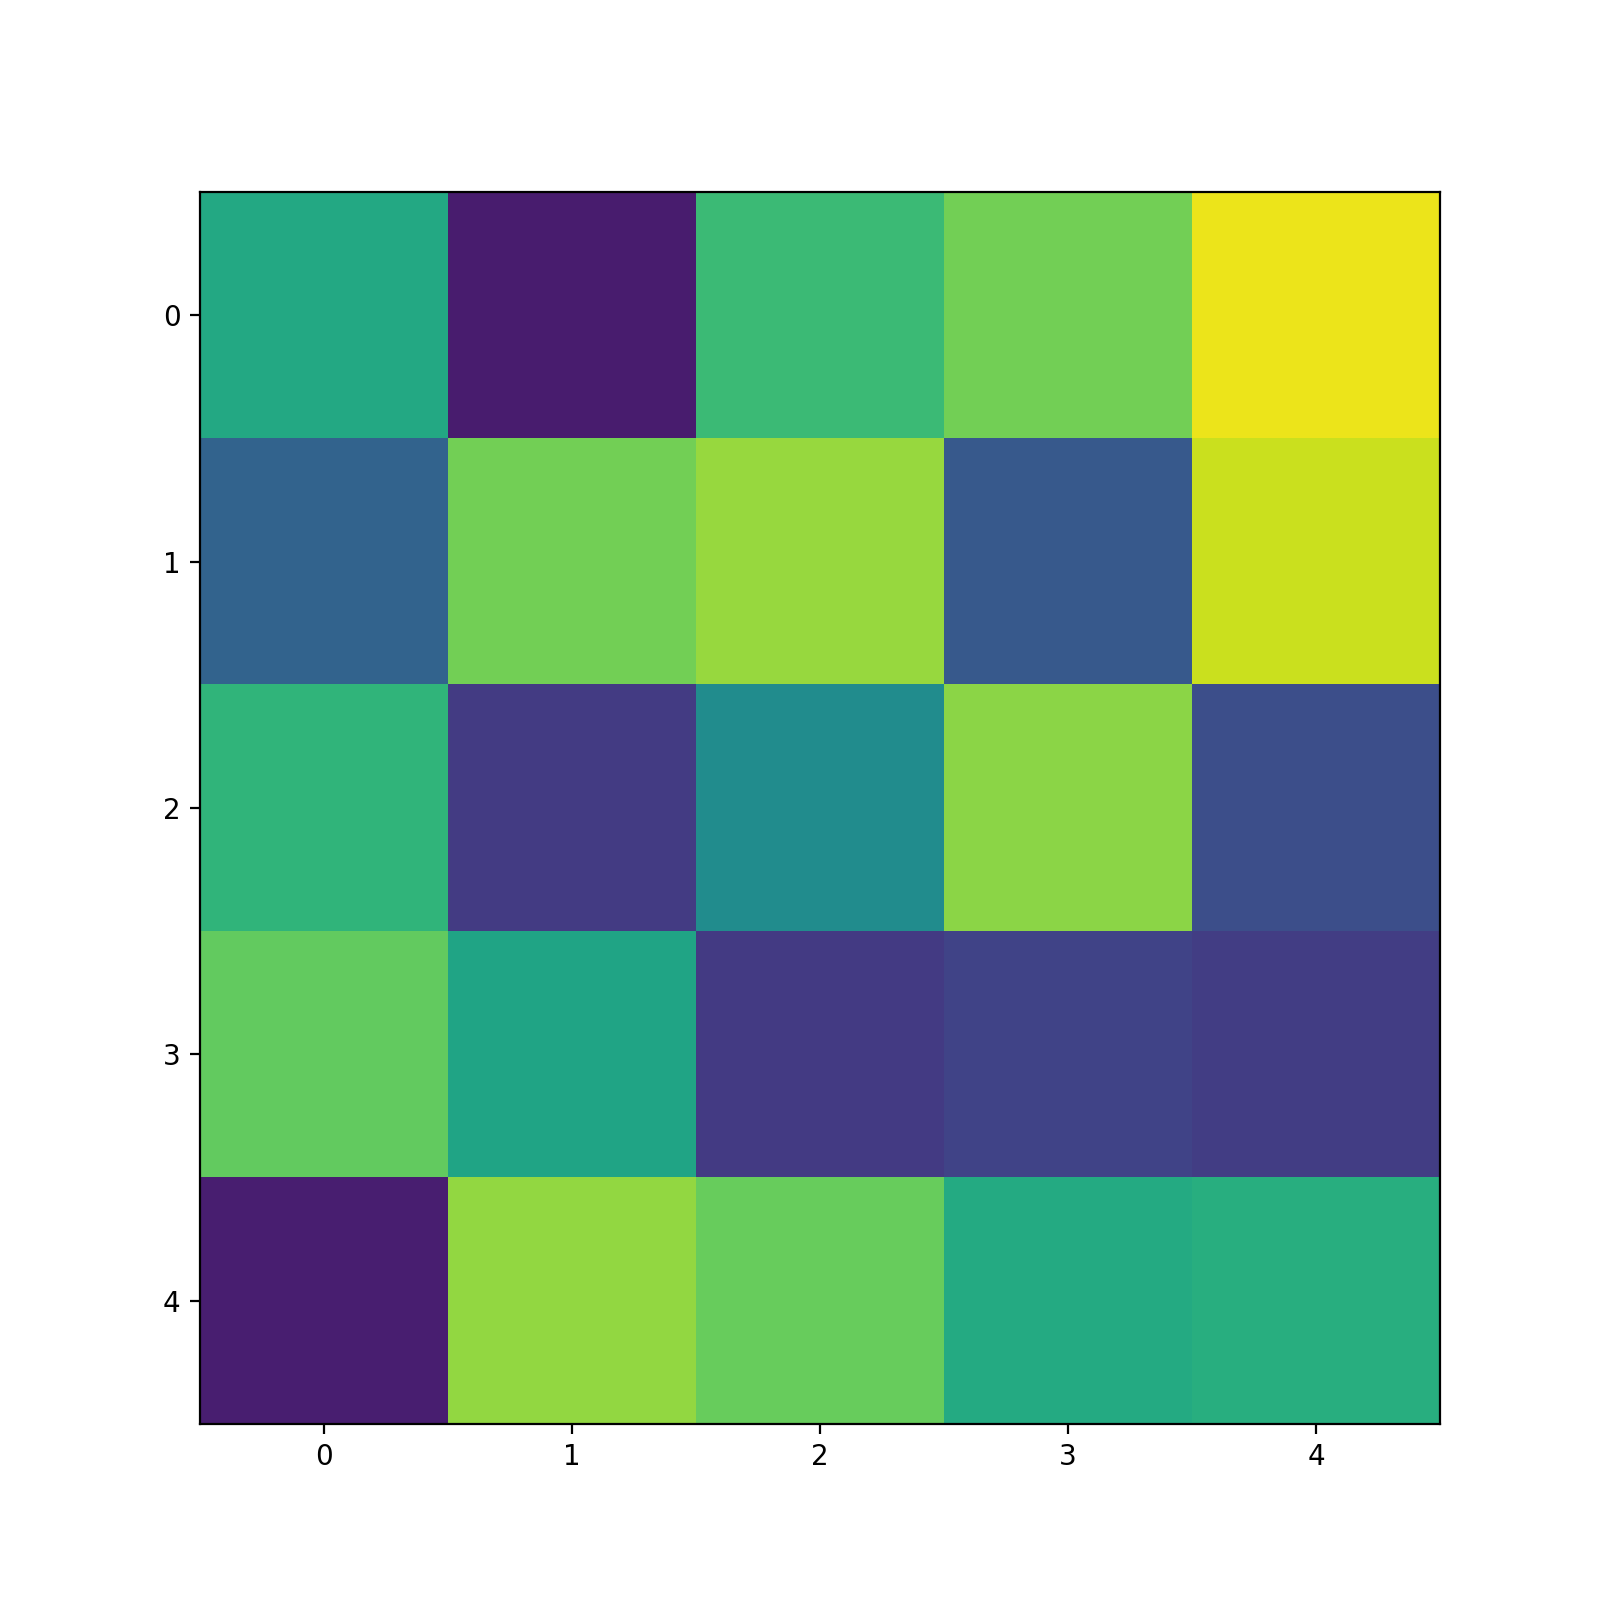

......Done!


In [1]:
%matplotlib notebook

import random
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import matplotlib.animation as animation


fps = 30
nSeconds = 5
snapshots = [ np.random.rand(5,5) for _ in range( nSeconds * fps ) ]

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure( figsize=(8,8) )

a = snapshots[0]
im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
    if i % fps == 0:
        print( '.', end ='' )

    im.set_array(snapshots[i])
    return [im]

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = nSeconds * fps,
                               interval = 1000 / fps, # in ms
                               )

anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

print('Done!')

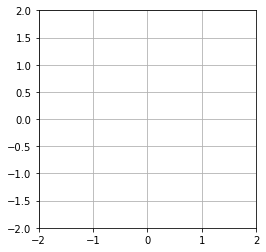

In [122]:
"""
General Numerical Solver for the 1D Time-Dependent Schrodinger's equation.

adapted from code at http://matplotlib.sourceforge.net/examples/animation/double_pendulum_animated.py

Double pendulum formula translated from the C code at
http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
%matplotlib inline

class DoublePendulum:
    """Double Pendulum Class

    init_state is [theta1, omega1, theta2, omega2] in degrees,
    where theta1, omega1 is the angular position and velocity of the first
    pendulum arm, and theta2, omega2 is that of the second pendulum arm
    """
    def __init__(self,
                 init_state = [120, 0, -20, 0],
                 L1=1.0,  # length of pendulum 1 in m
                 L2=1.0,  # length of pendulum 2 in m
                 M1=1.0,  # mass of pendulum 1 in kg
                 M2=1.0,  # mass of pendulum 2 in kg
                 G=9.8,  # acceleration due to gravity, in m/s^2
                 origin=(0, 0)): 
        self.init_state = np.asarray(init_state, dtype='float')
        self.params = (L1, L2, M1, M2, G)
        self.origin = origin
        self.time_elapsed = 0

        self.state = self.init_state * np.pi / 180.
    
    def position(self):
        """compute the current x,y positions of the pendulum arms"""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([self.origin[0],
                       L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([self.origin[1],
                       -L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        return (x, y)

    def energy(self):
        """compute the energy of the current state"""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([-L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        vx = np.cumsum([L1 * self.state[1] * cos(self.state[0]),
                        L2 * self.state[3] * cos(self.state[2])])
        vy = np.cumsum([L1 * self.state[1] * sin(self.state[0]),
                        L2 * self.state[3] * sin(self.state[2])])

        U = G * (M1 * y[0] + M2 * y[1])
        K = 0.5 * (M1 * np.dot(vx, vx) + M2 * np.dot(vy, vy))

        return U + K

    def dstate_dt(self, state, t):
        """compute the derivative of the given state"""
        (M1, M2, L1, L2, G) = self.params

        dydx = np.zeros_like(state)
        dydx[0] = state[1]
        dydx[2] = state[3]

        cos_delta = cos(state[2] - state[0])
        sin_delta = sin(state[2] - state[0])

        den1 = (M1 + M2) * L1 - M2 * L1 * cos_delta * cos_delta
        dydx[1] = (M2 * L1 * state[1] * state[1] * sin_delta * cos_delta
                   + M2 * G * sin(state[2]) * cos_delta
                   + M2 * L2 * state[3] * state[3] * sin_delta
                   - (M1 + M2) * G * sin(state[0])) / den1

        den2 = (L2 / L1) * den1
        dydx[3] = (-M2 * L2 * state[3] * state[3] * sin_delta * cos_delta
                   + (M1 + M2) * G * sin(state[0]) * cos_delta
                   - (M1 + M2) * L1 * state[1] * state[1] * sin_delta
                   - (M1 + M2) * G * sin(state[2])) / den2
        
        return dydx

    def step(self, dt):
        """execute one time step of length dt and update state"""
        self.state = integrate.odeint(self.dstate_dt, self.state, [0, dt])[1]
        self.time_elapsed += dt

#------------------------------------------------------------
# set up initial state and global variables
pendulum = DoublePendulum([180., 0.0, -20., 0.0])
dt = 1./30 # 30 fps

#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    time_text.set_text('')
    energy_text.set_text('')
    return line, time_text, energy_text

def animate(i):
    """perform animation step"""
    global pendulum, dt
    pendulum.step(dt)
    
    line.set_data(*pendulum.position())
    time_text.set_text('time = %.1f' % pendulum.time_elapsed)
    energy_text.set_text('energy = %.3f J' % pendulum.energy())
    return line, time_text, energy_text

# choose the interval based on dt and the time to animate one step
from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

ani = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval, blit=True, init_func=init)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('double_pendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()